In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from stable_baselines.bench import Monitor
from stable_baselines.bench import load_results

In [35]:
import csv
import json
import os
import time
from glob import glob

def load_results2(path):
    """
    Load results from a given file

    :param path: (str) the path to the log file
    :return: (Pandas DataFrame) the logged data
    """
    # get both csv and (old) json files
    monitor_files = (glob(os.path.join(path, "*.json")) + glob(os.path.join(path, "*monitor.csv")))
    if not monitor_files:
        raise LoadMonitorResultsError("no monitor files of the form *%s found in %s" % (Monitor.EXT, path))
    data_frames = []
    headers = []
    for file_name in monitor_files:
        with open(file_name, 'rt') as file_handler:
            if file_name.endswith('csv'):
                first_line = file_handler.readline()
                assert first_line[0] == '#'
                header = json.loads(first_line[1:])
                data_frame = pandas.read_csv(file_handler, index_col=None)
                headers.append(header)
            elif file_name.endswith('json'):  # Deprecated json format
                episodes = []
                lines = file_handler.readlines()
                header = json.loads(lines[0])
                headers.append(header)
                for line in lines[1:]:
                    episode = json.loads(line)
                    episodes.append(episode)
                data_frame = pandas.DataFrame(episodes)
            else:
                assert 0, 'unreachable'
            data_frame['t'] += header['t_start']
        data_frames.append(data_frame)
    data_frame = pandas.concat(data_frames)
    data_frame.sort_values('t', inplace=True)
    data_frame.reset_index(inplace=True)
    data_frame['t'] -= min(header['t_start'] for header in headers)
    # data_frame.headers = headers  # HACK to preserve backwards compatibility
    return data_frame

In [82]:
data_df = load_results("/Users/pehuen/Documents/ucla/compRob/Relational_DRL/exp_result/WarehouseEnv_A2C_RelationalPolicy/log_1")
data_df

,index,r,l,t
0,0,0,1,1.738050
1,0,0,1,1.738077
2,0,0,1,1.738103
3,0,0,1,1.738131
4,1,0,1,1.745407
...,...,...,...,...
795,198,0,1,7.366536
796,199,0,1,7.371541
797,199,0,1,7.371576
798,199,0,1,7.371596


In [80]:
data_df

,index,r,l,t
0,0,0,1,1.738050
1,0,0,1,1.738077
2,0,0,1,1.738103
3,0,0,1,1.738131
4,1,0,1,1.745407
...,...,...,...,...
795,198,0,1,7.366536
796,199,0,1,7.371541
797,199,0,1,7.371576
798,199,0,1,7.371596


In [54]:
data_df.r.value_counts()

0    3951
5      49
Name: r, dtype: int64

In [56]:
import seaborn as sns
sns.set()

/Users/pehuen/opt/anaconda3/envs/tensorflow/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


<AxesSubplot:xlabel='t', ylabel='l'>

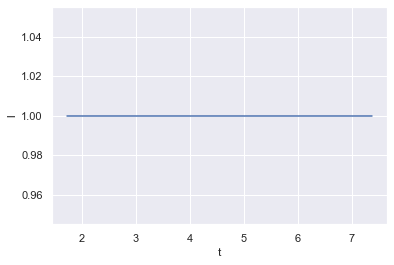

In [73]:
sns.lineplot(data = data_df, x = "t", y = "l")

<AxesSubplot:xlabel='index', ylabel='r'>

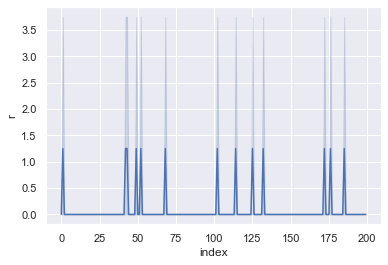

In [76]:
sns.lineplot(data = data_df, x = "index", y = "r")

<AxesSubplot:xlabel='t', ylabel='r'>

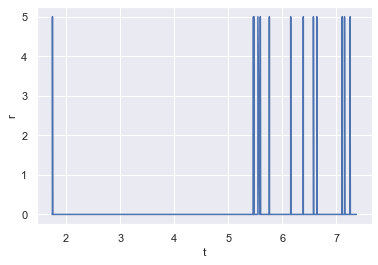

In [83]:
from stable_baselines.bench import Monitor
from stable_baselines.bench import load_results

import seaborn as sns
sns.set()

data_df = load_results("/Users/pehuen/Documents/ucla/compRob/Relational_DRL/exp_result/WarehouseEnv_A2C_RelationalPolicy/log_1")

sns.lineplot(data = data_df, x = "t", y = "r")